## Intro to anomaly detection with OpenCV, Computer Vision, and scikit-learn - PyImage Search by Adrian Rosebrock

Source: https://www.pyimagesearch.com/2020/01/20/intro-to-anomaly-detection-with-opencv-computer-vision-and-scikit-learn/

In this tutorial, we learn how to perform anomaly/novelty detection in image datasets (spot outliers and anomalies in your own image datasets) using OpenCV, Computer Vision, and the scikit-learn machine learning library.

How are machine learning algorithms, which tend to work optimally with balanced datasets, supposed to work when the anomalies we want to detect may only happen 1%, 0.1%, or 0.0001% of the time? Luckily, machine learning researchers have investigated this type of problem and have devised algorithms to handle the task.

Key Take-aways:
- Two types of events: Standard events and Anomaly events
- Anomaly detection algorithms are broken into two types:
    - Outlier detection: Includes Standard and Anomaly events in training data. Unsupervised learners used.
    - Novelty detection: Includes only labelled Standard events for training. Supervised learners used.
- Novelty detection is done in this tutorial.
- Isolation forests is the ensemble algorithm used. Isolation forests are a type of ensemble algorithm and consist of multiple decision trees used to partition the input dataset into distinct groups of inliers. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
- The task is to determine the anomaly among three images when compared to 15 other Standard event images. 
    

        

In [9]:
# Import Relevant libraries
# Import relevant libraries
from imutils import paths
import numpy as np
import cv2
import pickle
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

### Load and Process Data

Define a fuction to quantify and characterize the contents of input images using color histograms.

In [2]:
def quantify_image(image, bins=(4, 6, 3)):
    """Create color histograms to quantify and characterize the contents of input images"""
    
    # Compute a 3D color histogram over an images and normalize it
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, 
                        [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    
    # Return the histogram
    return hist

Then we load the dataset and loop the image paths while quantifying them using the quantify_image method

In [3]:
# Grab the paths to all images in our dataset directory, then 
# initilaize our lists of images
image_paths = list(paths.list_images("forest"))
data = []

# Loop over the image paths
for image_path in image_paths:
    
    # Load the image and convert it to the HSV color space
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Quatify the image and update the data list
    features = quantify_image(image)
    data.append(features)
    
data = np.array(data)

### Implement Anomaly Detection Algorithm

In [4]:
# Train Anomaly Detection model
model = IsolationForest(n_estimators=100, contamination=0.01,
                       random_state=42)
model.fit(data)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

In [17]:
# To serialize detector to a pickle file on disk
with open("anomaly_detector.model", "wb") as f:
    f.write(pickle.dumps(model))
    f.close()

### Test for anomaly in images

In [5]:
# Load the input image, convert it to the HSV color space, and
# quantify the image in the same manner we did during training

test_images = list(paths.list_images("examples"))
print(test_images)

['examples\\coast_osun52.jpg', 'examples\\forest_cdmc290.jpg', 'examples\\highway_a836030.jpg']


In [26]:
# Load the Anomaly detection model
print("[INFO] Loading Anomaly detection model...")
model = pickle.loads(open("anomaly_detector.model", "rb").read())

image = cv2.imread("examples\\highway_a836030.jpg")
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
features = quantify_image(hsv)

[INFO] Loading Anomaly detection model...


-1


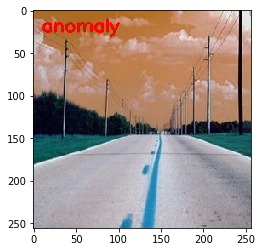

In [27]:
# Use the anomaly detector model and extracted features to determine 
# if the test image is an anomaly or not

preds = model.predict([features])[0]
label = "anomaly" if preds == -1 else "normal"
color = (255, 0, 0) if preds == -1 else (0, 255, 0)

# Draw the predicted label text on the original image
cv2.putText(image, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
           0.7, color, 2)

# Display the image
#cv2.imshow("Output", image)
print(preds)
plt.imshow(image)

In [12]:
preds

1